# 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime

# 2. Load data

In [2]:
merged = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/sil_snd_aisp_nivel_merged.csv',index_col=0, parse_dates=True)

# 3. Plotting

## 3.1 Overview

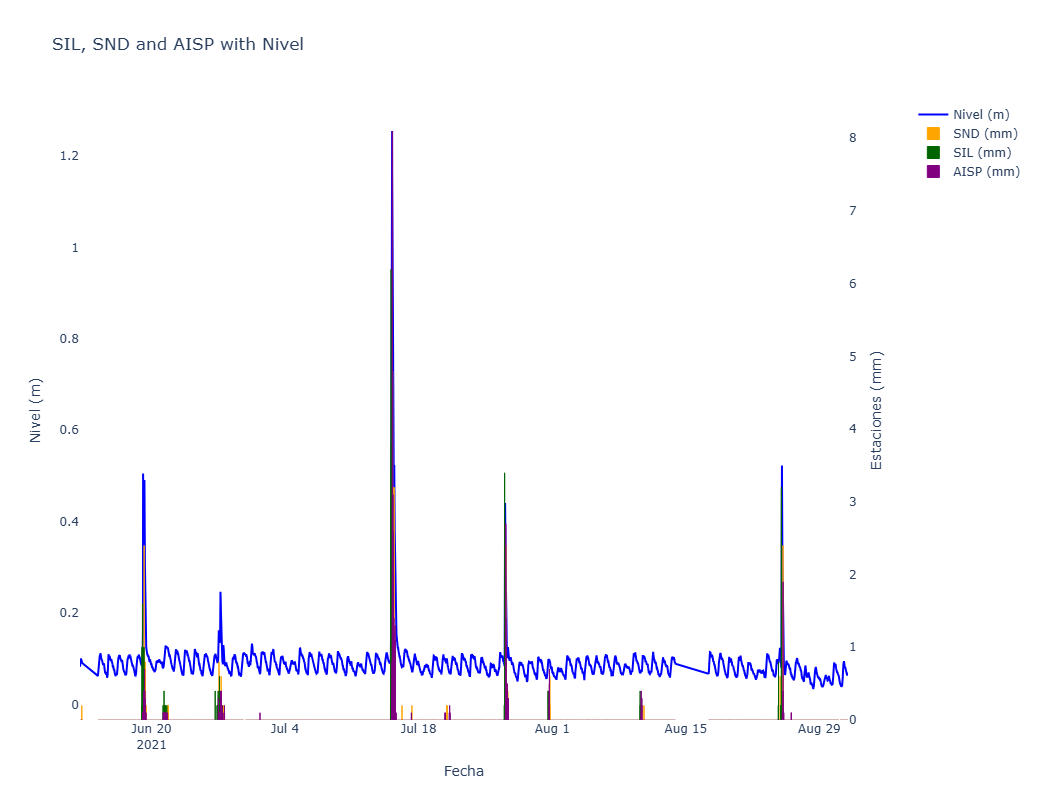

In [6]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=merged.index,
        y=merged["nivel"],
        mode="lines",
        line=dict(color='blue'),
        name="Nivel (m)"
    ),
    secondary_y=False
)

fig.add_trace(
    go.Bar(
        x=merged.index,
        y=merged["snd"],
        name="SND (mm)",
        marker=dict(
            color="orange",
            opacity=1,
            line=dict(
                color="orange",
                width=1
            )
        )
    ),
    secondary_y=True
)

fig.add_trace(
    go.Bar(
        x=merged.index,
        y=merged["sil"],
        name="SIL (mm)",
        marker=dict(
            color="darkgreen",
            opacity=1,
            line=dict(
                color="darkgreen",
                width=1
            )
        )
    ),
    secondary_y=True
)

fig.add_trace(
    go.Bar(
        x=merged.index,
        y=merged["aisp"],
        name="AISP (mm)",
        marker=dict(
            color="purple",
            opacity=1,
            line=dict(
                color="purple",
                width=1
            )
        )
    ),
    secondary_y=True
)

fig.update_layout(
    title="SIL, SND and AISP with Nivel",
    xaxis_title="Fecha",
    barmode="group", 
    legend=dict(
        x=1.02,
        y=1,
        bgcolor='rgba(255,255,255,0)'
    ),
    plot_bgcolor='white',
    height=800,
    paper_bgcolor='white',
    
)

fig.update_yaxes(title_text="Nivel (m)", secondary_y=False)
fig.update_yaxes(title_text="Estaciones (mm)", secondary_y=True)

fig.show()

## 3.2 Zoom selection

In [7]:
def pedir_fecha(mensaje):
    print(mensaje)
    year = int(input("Año: "))
    month = int(input("Mes: "))
    day = int(input("Día: "))
    hour = int(input("Hora: "))
    minute = int(input("Minuto: "))
    second = int(input("Segundo: "))
    return datetime.datetime(year, month, day, hour, minute, second)

Ingrese la fecha de inicio:


Año:  2021
Mes:  7
Día:  26
Hora:  21
Minuto:  0
Segundo:  0


Ingrese la fecha de fin:


Año:  2021
Mes:  7
Día:  27
Hora:  12
Minuto:  0
Segundo:  0


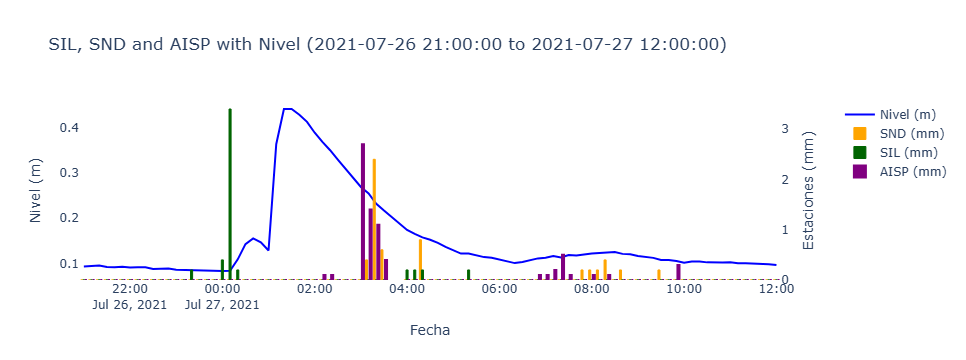

In [10]:
fecha_inicio = pedir_fecha("Ingrese la fecha de inicio:")
fecha_fin = pedir_fecha("Ingrese la fecha de fin:")

merged_filtered = merged.loc[(merged.index >= fecha_inicio) & (merged.index <= fecha_fin)]
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=merged_filtered.index,
        y=merged_filtered["nivel"],
        mode="lines",
        line=dict(color='blue'),
        name="Nivel (m)"
    ),
    secondary_y=False
)

fig.add_trace(
    go.Bar(
        x=merged_filtered.index,
        y=merged_filtered["snd"],
        name="SND (mm)",
        marker=dict(
            color="orange",
            opacity=1,
            line=dict(
                color="orange",
                width=1
            )
        )
    ),
    secondary_y=True
)

fig.add_trace(
    go.Bar(
        x=merged_filtered.index,
        y=merged_filtered["sil"],
        name="SIL (mm)",
        marker=dict(
            color="darkgreen",
            opacity=1,
            line=dict(
                color="darkgreen",
                width=1
            )
        )
    ),
    secondary_y=True
)

fig.add_trace(
    go.Bar(
        x=merged_filtered.index,
        y=merged_filtered["aisp"],
        name="AISP (mm)",
        marker=dict(
            color="purple",
            opacity=1,
            line=dict(
                color="purple",
                width=2
            )
        )
    ),
    secondary_y=True
)

fig.update_layout(
    title="SIL, SND and AISP with Nivel (2021-07-26 21:00:00 to 2021-07-27 12:00:00)",
    xaxis_title="Fecha",
    barmode="group",  
    legend=dict(
        x=1.02,
        y=1,
        bgcolor='rgba(255,255,255,0)'
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=800  
)

fig.update_yaxes(title_text="Nivel (m)", secondary_y=False)
fig.update_yaxes(title_text="Estaciones (mm)", secondary_y=True)

fig.show()

## 3.3 Peaks